In [1]:
#importing relevant libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import math
##to store plot outputs within the jupyter notebook
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

In [3]:
#Import the datasets
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

### Explorartory Data Analysis

In [4]:
#Features and Observations
print('Training Set : %d observations & %d features'%(train.shape[0],train.shape[1]))
#print('Test Set : %d observations & %d features'%(test.shape[0],test.shape[1]))

Training Set : 114321 observations & 133 features


In [5]:
train.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
           ...   
v127      float64
v128      float64
v129        int64
v130      float64
v131      float64
Length: 133, dtype: object

In [6]:
train.dtypes.value_counts()

float64    108
object      19
int64        6
dtype: int64

In [7]:
pd.set_option('display.max_columns', None)
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [8]:
#pd.set_option('display.max_columns', None)
train.describe(include="all")

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,110864,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,113821,6.364600e+04,114321,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,54211,110864,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,114321,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,114318,6.448500e+04,65702.000000,6.448900e+04,107439,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,114321,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321,114321.000000,6.448500e+04,114321,114321,6.452500e+04,6.448900e+04,6.442600e+04,114321,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,114318,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,114318,6.569700e+04,6.569700e+04,114321,6.448900e+04,113939,59017,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,114244,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18210,NaN,5,NaN,NaN,NaN,NaN,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,9,NaN,NaN,3,4,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,3,NaN,22,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGDF,NaN,E,NaN,NaN,NaN,NaN,NaN,C,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,BW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,F,NaN,NaN,B,D,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,A,NaN,F,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BM,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,110584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2386,NaN,55177,NaN,NaN,NaN,NaN,NaN,32178,88347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55425,NaN,NaN,NaN,NaN,11103,NaN,NaN,NaN,11351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70353,NaN,NaN,NaN,NaN,75094,NaN,NaN,113560,75087,NaN,NaN,NaN,34561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27079,NaN,NaN,55688,NaN,21671,16252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5759,NaN,NaN,NaN,NaN,NaN,NaN
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,NaN,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+0

In [9]:
#pd.set_option('display.max_rows', None)
train.apply(pd.Series.nunique)

ID        114321
target         2
v1         64487
v2         64524
v3             3
           ...  
v127       64488
v128       65687
v129          10
v130       64476
v131       64414
Length: 133, dtype: int64

In [10]:
train.isnull().mean() * 100 #% of missing data

ID         0.000000
target     0.000000
v1        43.589542
v2        43.558051
v3         3.023941
            ...    
v127      43.589542
v128      42.532868
v129       0.000000
v130      43.599164
v131      43.644650
Length: 133, dtype: float64

<AxesSubplot:>

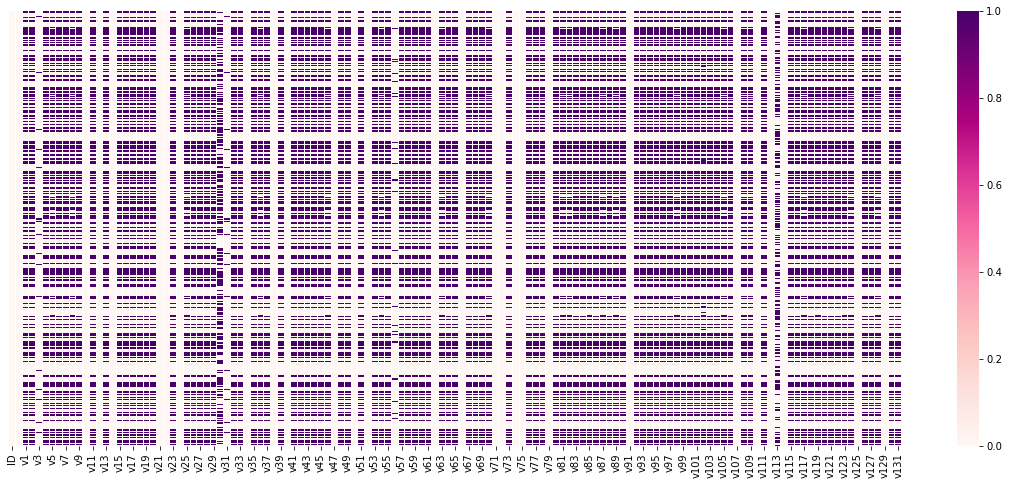

In [11]:
plt.figure(figsize = (20,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap = "RdPu") #lower values indicate lesser missing values

In [12]:
cor = train.corr()
cor

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
ID,1.000000,-0.000080,0.002077,0.000492,0.000707,-0.002149,0.003294,0.001049,-0.001218,0.005397,-0.000651,-0.005335,-0.000244,0.005987,0.000752,0.007414,-0.001060,0.001293,-0.002582,0.002143,0.003920,0.001783,-0.001852,-0.001458,0.004820,-0.001926,-0.004449,0.007085,0.006825,-0.000943,-0.003776,-0.001176,0.001604,0.001563,0.002465,0.000567,0.003546,0.004671,0.006695,0.001855,0.000858,-0.002606,-0.001293,-0.002595,0.003816,-0.000960,-0.000916,-0.006919,-0.001572,-0.000984,-0.000103,0.001235,0.002473,0.004642,0.002499,0.000315,-0.000915,0.001975,0.003230,0.007728,-0.001244,-0.000649,-0.000993,0.001610,0.003974,0.000705,0.006528,-0.001908,-0.004222,0.001689,0.000307,-0.000262,-0.002867,-0.003619,0.009684,0.001005,0.001651,-0.000399,-0.002033,0.004255,0.001621,-0.002372,0.003973,0.004263,0.005038,0.001534,0.004240,-0.001624,-0.002273,-0.001760,-0.002020,0.003392,-0.000941,0.002642,0.000993,-0.001788,-0.000509,-0.003646,0.001520,0.000586,-0.001644,0.005180,-0.005143,0.002021,-0.001624,0.008248,-0.003393,-0.000232,-0.002028,-0.001602,-0.001285,-0.000249,0.000610,0.005567
target,-0.000080,1.000000,-0.008114,0.036568,0.059842,0.022336,0.030610,0.033370,-0.011442,-0.012566,0.148680,0.011786,0.054710,-0.025254,0.130670,-0.032436,-0.009692,0.047620,0.003965,-0.010894,0.028478,0.067634,-0.032675,-0.008079,0.030004,0.028798,-0.012980,0.023229,-0.032277,-0.046213,0.095884,-0.002863,-0.040873,-0.021445,0.061863,0.022625,-0.031080,0.010202,-0.001053,0.028870,0.046616,-0.028626,-0.009907,-0.055493,-0.002467,0.241683,-0.049183,0.008830,-0.005125,-0.045500,0.027221,-0.032392,0.030776,0.032393,0.047781,-0.093709,-0.010366,0.050931,0.040021,0.006418,-0.021592,-0.012039,-0.003867,0.075241,-0.036793,0.045078,0.006359,-0.008136,-0.028250,-0.031728,0.020322,-0.045349,-0.040008,-0.050820,-0.018914,0.031741,0.044028,-0.005407,-0.011763,-0.009707,0.051708,-0.010085,-0.019217,0.023412,0.010522,0.023068,0.032925,0.032565,0.050835,0.009728,-0.017448,-0.022747,-0.004771,0.054226,0.032899,0.031114,-0.040860,0.075786,0.011771,0.023532,0.013875,0.004366,-0.058578,0.000221,-0.044467,0.003251,-0.055940,-0.006770,0.000537,0.013986,0.034045,0.142141,-0.046252,0.027538
v1,0.002077,-0.008114,1.000000,-0.213646,-0.141588,-0.067014,-0.015818,0.099846,0.154134,-0.021217,-0.019902,-0.267565,-0.018406,0.059751,-0.018212,0.055099,-0.204318,-0.096924,0.098285,-0.013096,-0.179236,-0.003483,0.183210,0.164490,0.222439,0.040718,0.044480,-0.209288,0.039089,0.424650,-0.013783,-0.095683,0.122152,0.893554,-0.014742,0.062533,0.004497,-0.140966,0.024619,0.243441,-0.179981,-0.026896,0.154248,0.181657,-0.081194,-0.008457,0.187073,-0.164165,0.169784,0.402672,-0.009138,0.244104,-0.183239,0.028721,-0.235663,-0.000426,0.160960,-0.128445,-0.290044,-0.053289,-0.074815,0.106303,-0.045425,-0.026569,0.069453,-0.078857,-0.175073,-0.226242,0.178233,0.096944,-0.156147,0.339135,0.195089,0.255141,-0.050935,-0.069770,-0.081639,0.182939,-0.047527,-0.173382,-0.133587,0.104554,-0.096015,-0.233546,-0.062591,-0.057842,-0.137097,-0.246023,-0.176610,0.167918,0.142636,0.047406,0.152834,-0.190802,-0.030466,-0.000356,0.391530,-0.007677,-0.105065,0.137981,0.036865,0.181265,0.219235,0.047738,0.354057,-0.129005,0.300573,0.149997,0.032009,-0.007216,-0.031953,-0.023630,0.261638,0.695383
v2,0.000492,0.036568,-0.213646,1.000000,0.537830,0.203350,0.021973,0.350390,-0.362706,-0.008776,0.050054,0.219052,0.038455,-0.427566,0.060944,-0.330207,0.023800,0.562626,-0.219675,-0.231091,0.418304,0.037345,-0.318730,-0.328444,0.221698,0.232514,-0.245570,0.302679

<AxesSubplot:>

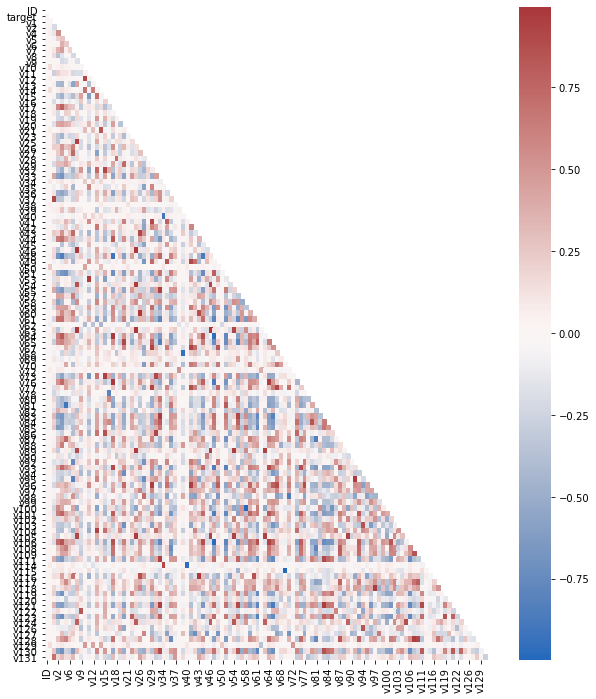

In [13]:
tricor = np.triu(cor)
plt.figure(figsize = (10,12))
sns.heatmap(cor, mask=tricor, yticklabels=True, cmap='vlag')

In [14]:
pd.set_option('display.max_rows', None)
train.corr().unstack().sort_values().drop_duplicates()

v100    v58      -0.997665
v69     v115     -0.993691
v106    v48      -0.980726
v40     v114     -0.966913
v64     v48      -0.962521
v68     v39      -0.946538
v48     v17      -0.910450
v81     v5       -0.905518
v34     v40      -0.903123
v48     v44      -0.868674
v121    v65      -0.865668
v48     v76      -0.865127
v70     v98      -0.846775
v48     v93      -0.843883
v4      v48      -0.843663
v48     v101     -0.837691
v87     v81      -0.835494
v123    v61      -0.825564
v65     v33      -0.824188
v93     v51      -0.814982
v65     v83      -0.811579
v95     v7       -0.806695
v78     v16      -0.801414
v51     v106     -0.792894
v61     v48      -0.787378
v33     v61      -0.785517
v65     v55      -0.784735
v108    v81      -0.776802
v130    v61      -0.775621
v121    v61      -0.773288
v33     v106     -0.768702
v51     v64      -0.765212
v128    v81      -0.763810
v61     v83      -0.760558
v51     v101     -0.759671
v106    v123     -0.758649
v111    v65      -0.756868
v

<AxesSubplot:>

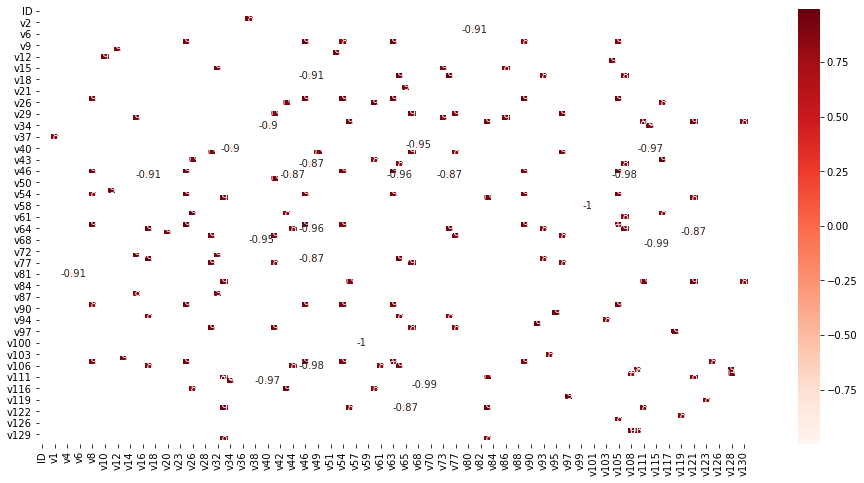

In [15]:
dfCorr = train.corr()
filteredDf = dfCorr[((dfCorr >= .85) | (dfCorr <= -.85)) & (dfCorr !=1.000)]
plt.figure(figsize=(16,8))
sns.heatmap(filteredDf, annot=True, cmap="Reds")

### Missing Value Imputation & Label Encoding

#### Imputing missing values under numeric variables with Median

In [16]:
pd.set_option('display.max_columns', None)
data_imp = train
data_imp = data_imp.fillna(data_imp.median().to_dict())
data_imp.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.469550,7.023803,C,4.205991,9.191265,2.412790,2.452166,2.301630,9.059582,1.312910,15.495952,6.507647,3.591081,11.636386,1.992031,4.932127,3.554267,0.773906,0.198655,18.036585,6.763110,GUV,1.845672e-07,C,3.056144,1.826277,2.673321,5.043831,8.296139,C,A,1.557203,1.946169,3.615077,8.068506,14.579479,0.642856,0,0.378418,14.305766,7.203020,12.934363,2.152007,10.782008,9.156046,2.449959,E,12.411608,8.022771,1.379210,7.134018,G,15.770926,1.129469,1.370940,DY,4.067039,5.330550,10.535108,1.667033,15.075895,2,2.544736,6.108900,16.262525,A,9.313861,18.274548,9.516129,12.053353,F,2,2.331261,B,D,2.170300,7.375825,13.333334,D,2.090909,7.277655,3.430691,1.937244,1.423295,2.594937,1.158301,9.848004,1.761547,2.678584,0.969183,B,0.542669,5.301047,3.743106,0.620113,6.511627,7.446808,8.303967,1.235546,14.475939,6.623714,2.462898,5.125847,2.512034,1.505335,12.085177,B,1.825361,4.247858,A,3.108809,U,G,10.308044,10.476191,2.222223,10.595357,8.136964,1.461561e+00,1.144708,2.436195,6.749117,2.739239,0.598896,AF,1.614802,2.963620,1.957825,0,1.560138,1.589403
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644

In [17]:
data_imp = data_imp.dropna(axis = 1)  #once we impute with median we will only have categorical variables with NaN values, dropped all categorical features with missing values
pd.set_option('display.max_columns', None)
data_imp.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v24,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v110,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,16.747968,0.037096,1.299638,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,2.382692,3.930922,B,0.433213,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.469550,7.023803,4.205991,9.191265,2.412790,2.452166,2.301630,9.059582,1.312910,15.495952,6.507647,3.591081,11.636386,1.992031,4.932127,3.554267,0.773906,0.198655,18.036585,6.763110,1.845672e-07,C,3.056144,1.826277,2.673321,5.043831,8.296139,1.557203,1.946169,3.615077,8.068506,14.579479,0.642856,0,0.378418,14.305766,7.203020,12.934363,2.152007,10.782008,9.156046,2.449959,E,12.411608,8.022771,1.379210,7.134018,15.770926,1.129469,1.370940,4.067039,5.330550,10.535108,1.667033,15.075895,2,2.544736,6.108900,16.262525,A,9.313861,18.274548,9.516129,12.053353,F,2,2.331261,B,D,2.170300,7.375825,13.333334,D,2.090909,7.277655,3.430691,1.937244,1.423295,2.594937,1.158301,9.848004,1.761547,2.678584,0.969183,0.542669,5.301047,3.743106,0.620113,6.511627,7.446808,8.303967,1.235546,14.475939,6.623714,2.462898,5.125847,2.512034,1.505335,12.085177,1.825361,4.247858,A,3.108809,10.308044,10.476191,2.222223,10.595357,8.136964,1.461561e+00,1.144708,2.436195,6.749117,2.739239,0.598896,1.614802,2.963620,1.957825,0,1.560138,1.589403
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,15.102041,0.085573,0.765305,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,1.375753,1.184211,B,3.367348,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591

In [18]:
X, Y = data_imp.iloc[:,2:], pd.Series(data_imp.iloc[:,1], dtype=int, name=data_imp.iloc[:,1].name)

In [19]:
data_imp.isnull().sum()

ID        0
target    0
v1        0
v2        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
v29       0
v32       0
v33       0
v34       0
v35       0
v36       0
v37       0
v38       0
v39       0
v40       0
v41       0
v42       0
v43       0
v44       0
v45       0
v46       0
v47       0
v48       0
v49       0
v50       0
v51       0
v53       0
v54       0
v55       0
v57       0
v58       0
v59       0
v60       0
v61       0
v62       0
v63       0
v64       0
v65       0
v66       0
v67       0
v68       0
v69       0
v70       0
v71       0
v72       0
v73       0
v74       0
v75       0
v76       0
v77       0
v78       0
v79       0
v80       0
v81       0
v82       0
v83       0
v84       0
v85       0
v86       0
v87       0
v88 

#### Label Encoding of categorical variables with no missing values

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [21]:
#label encoding of the residual categorical variables
def convert_numeric(dataframe= data_imp, one_hot=False, encoders={}, scaling=False, scaler={}, drop_one=True): #replace this func with the original func of same name
  df = dataframe.copy()
  catagorical_var = [x for x in df.columns if df[x].dtype=='O']
  if not one_hot:
    for i in catagorical_var:
      try:
        le = encoders[i]
      except:
        le = LabelEncoder()
        le.fit(df[i])
        encoders[i] = le
      df[i] = df[i].map(lambda s: '<unknown>' if s not in le.classes_ else s)
      le.classes_ = np.append(le.classes_, '<unknown>')
      df[i]=le.transform(df[i])
  else:
    for i in catagorical_var:
      try:
        enc = encoders[i]
      except:
        enc = OneHotEncoder(handle_unknown='ignore')
        enc.fit(np.array(df[i]).reshape((-1,1)))
        encoders[i]=enc
      if drop_one:
        df[enc.get_feature_names([i])[:-1]]=np.array(enc.transform(np.array(df[i]).reshape((-1,1))).toarray()[:,:-1], dtype=int)
      else:
        df[enc.get_feature_names([i])]=np.array(enc.transform(np.array(df[i]).reshape((-1,1))).toarray(), dtype=int)
    df = df[[x for x in df.columns if x not in catagorical_var]]
  if scaling:
    for i in df.columns:
      try:
        sc = scaler[i]
      except:
        sc = MinMaxScaler().fit(np.array(df[i]).reshape((-1, 1)))
        scaler[i]=sc
      df[i] = sc.transform(np.array(df[i]).reshape((-1, 1)))
  return df, encoders, scaler


In [22]:
new_df, encoder, scaler = convert_numeric(scaling=True)

In [23]:
data = new_df
pd.set_option('display.max_columns', None)
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v24,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v110,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,0.000000,1.0,0.066787,0.436374,0.196051,0.395763,0.129964,0.158845,0.000647,0.500000,0.027155,0.821705,0.325256,0.143342,0.581819,0.067751,0.428571,0.183518,0.005336,0.007444,0.938825,0.397332,4.914159e-08,0.50,0.004929,0.086041,0.169675,0.029732,0.444043,0.061673,0.050542,0.363507,0.418773,0.566330,0.022727,0.0,0.201455,0.385573,0.382671,0.635379,0.100775,0.529372,0.492434,0.002218,0.222222,0.608587,0.404332,0.044971,0.363890,0.837398,0.001203,0.064982,0.198556,0.026490,0.544549,0.079422,0.841417,0.142857,0.005034,0.318160,0.912305,1.0,0.465704,0.742240,0.857143,0.585761,0.500,0.083333,0.080749,0.5,1.000000,0.111547,0.456532,0.428571,0.235294,0.150000,0.376416,0.443082,0.032491,0.064982,0.085366,0.049338,0.457526,0.166065,0.003670,0.143574,0.049558,0.290701,0.184984,0.050936,0.371841,0.272727,0.465791,0.059567,0.973510,0.419462,0.137869,0.232982,0.078702,0.000360,0.628959,0.119135,0.196546,0.5,0.021661,0.781745,0.142857,0.097561,0.329601,0.295455,1.850380e-08,0.101941,0.040179,0.400000,0.100201,0.001788,0.115415,0.155686,0.101214,0.000000,0.031818,0.142857
1,0.000004,1.0,0.073478,0.351190,0.210300,0.459563,0.120640,0.122608,0.115082,0.452979,0.070838,0.774798,0.347806,0.179554,0.581819,0.099602,0.246606,0.177713,0.038695,0.009933,0.893773,0.346898,5.922802e-08,0.50,0.151065,0.091314,0.133666,0.254120,0.414807,0.088674,0.097309,0.180754,0.403425,0.728974,0.032143,0.0,0.019001,0.715288,0.360151,0.646718,0.107600,0.543676,0.457802,0.119445,0.444444,0.620580,0.401139,0.068961,0.356701,0.788546,0.055857,0.068547,0.203352,0.266528,0.526755,0.083352,0.799911,0.285714,0.124915,0.305445,0.806756,0.0,0.465693,0.906725,0.475806,0.599625,0.500,0.166667,0.116563,0.5,1.000000,0.108515,0.461754,0.666667,0.176471,0.104546,0.363883,0.171535,0.096862,0.071165,0.129747,0.065959,0.473139,0.088077,0.132960,0.153698,0.060811,0.265052,0.196837,0.068366,0.325581,0.372340,0.435703,0.061777,0.723797,0.331186,0.123145,0.273011,0.125602,0.075262,0.604259,0.091268,0.212393,0.0,0.155440,0.515402,0.523810,0.111111,0.529768,0.406848,7.307809e-02,0.110129,0.121810,0.337456,0.138308,0.029945,0.103304,0.148181,0.097891,0.000000,0.078007,0.079470
2,0.000009,1.0,0.047194,0.265504,0.220548,0.266308,0.198980,0.196429,0.000982,0.633333,0.041322,0.737805,0.341234,0.125279,0.480177,0.099206,0.294118,0.158542,0.012227,0.007213,0.889215,0.267790,3.607439e-08,1.00,0.003655,0.112245,0.265306,0.042120,0.375000,0.082802,0.086735,0.202193,0.397959,0.636526,0.012987,0.0,0.370513,0.653860,0.308673,0.617347,0.146342,0.448654,0.267191,0.002844,0.222222,0.635566,0.341837,0.030225,0.481881,0.755102,0.003628,0.038265,0.201531,0.213873,0.455274,0.107568,0.852955,0.142857,0.003539,0.275897,0.812685,0.0,0.418367,0.515665,0.294118,0.414331,0.125,0.250000,0.120681,0.5,0.333333,0.098199,0.370511,0.588235,0.235294,0.166667,0.509722,0.413310,0.076531,0.076531,0.121495,0.061012,0.399311,0.168367,0.004456,0.128683,0.030422,0.257828,0.221649,0.034139,0.283163,0.298701,0.608058,0.042092,0.774566,0.293968,0.164639,0.315546,0.083420,0.000409,0.583529,0.068788,0.059211,0.5,0.168367,0.560278,0.647059,0.156463,0.173946,0.311688,3.602719e-08,0.205760,0.111940,0.466667,0.125005,0.000673,0.113469,0.196110,0.056023,0.181818,0.044156,0.058824
3,0.000013,1.0,0.039871,0.415238,0.211297,0.581372,0.104885,0.099377,0.008597,0.448276,0.353011,0.817374,0.515573,0.195165,0.704736,0.097252,0.275862,0.180539,0.061206,0.011582,0.912159,0.386190,2.597294e-08,0.75,0.005401,0.065414,0.115182,0.449747,0.443726,0.0

### Feature Selection

In [24]:
# Check the presence of null data
[col for col in data.columns if data[col].isnull().sum() > 0] 

[]

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(114321, 122)

In [26]:
X = data.drop('target', axis = 1)
y = data['target']
X.shape, y.shape

((114321, 121), (114321,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 0, stratify = y)

In [28]:
X_test.head(10)

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v24,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v110,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
69453,0.606244,0.073478,0.351190,0.210300,0.433543,0.120640,0.122608,0.019302,0.452979,0.353011,0.774798,0.558944,0.179554,0.759662,0.099602,0.246606,0.177713,0.038695,0.009933,0.893773,0.448137,5.922802e-08,1.00,0.021608,0.091314,0.133666,0.254120,0.414807,0.088674,0.097309,0.289461,0.403425,0.688281,0.032143,0.0,1.900122e-02,0.806563,0.360151,0.646718,0.107600,0.543676,0.457802,0.018608,0.222222,0.620580,0.401139,0.053701,0.356701,0.788546,0.015035,0.068547,0.203352,0.266528,0.526755,0.083352,0.799911,0.142857,0.020443,0.305445,0.806756,0.0,0.465693,0.906725,0.475806,0.622396,0.125,0.250000,0.116563,0.5,0.333333,0.108515,0.461754,0.666667,0.058824,0.104546,0.375887,0.184423,0.096862,0.071165,0.129747,0.065959,0.480925,0.088077,0.015517,0.153698,0.060811,0.265052,0.196837,0.068366,0.325581,0.372340,0.401083,0.061777,0.723797,0.331186,0.123145,0.273011,0.125602,0.012123,0.604259,0.099042,0.154395,0.5,0.155440,0.391460,0.523810,0.111111,0.403509,0.406848,0.073078,0.110129,0.121810,0.337456,0.138308,0.006993,0.103304,0.148181,0.089922,0.181818,0.078007,0.079470
111776,0.977823,0.073478,0.351190,0.210300,0.433543,0.120640,0.122608,0.019302,0.452979,0.310508,0.774798,0.457226,0.179554,0.721828,0.099602,0.246606,0.177713,0.038695,0.009933,0.893773,0.416346,5.922802e-08,0.50,0.021608,0.091314,0.133666,0.254120,0.414807,0.088674,0.097309,0.417658,0.403425,0.688281,0.032143,0.0,1.900122e-02,0.564214,0.360151,0.646718,0.107600,0.543676,0.457802,0.018608,0.222222,0.620580,0.401139,0.237767,0.356701,0.788546,0.015035,0.068547,0.203352,0.266528,0.526755,0.083352,0.799911,0.000000,0.020443,0.305445,0.806756,0.0,0.465693,0.906725,0.475806,0.622396,0.500,0.083333,0.116563,0.5,1.000000,0.108515,0.461754,0.666667,0.058824,0.104546,0.375887,0.184423,0.096862,0.071165,0.129747,0.065959,0.480925,0.088077,0.015517,0.153698,0.060811,0.265052,0.196837,0.068366,0.325581,0.372340,0.401083,0.061777,0.723797,0.331186,0.123145,0.273011,0.125602,0.012123,0.604259,0.099042,0.154395,0.5,0.155440,0.724397,0.523810,0.111111,0.403509,0.406848,0.073078,0.110129,0.121810,0.337456,0.138308,0.006993,0.103304,0.148181,0.089922,0.090909,0.078007,0.079470
44152,0.386231,0.073478,0.351190,0.210300,0.433543,0.120640,0.122608,0.019302,0.452979,0.085006,0.774798,0.357746,0.179554,0.651214,0.099602,0.246606,0.177713,0.038695,0.009933,0.893773,0.409627,5.922802e-08,1.00,0.021608,0.091314,0.133666,0.254120,0.414807,0.088674,0.097309,0.372302,0.403425,0.688281,0.032143,0.0,1.900122e-02,0.425620,0.360151,0.646718,0.107600,0.543676,0.457802,0.018608,0.888889,0.620580,0.401139,0.069914,0.356701,0.788546,0.015035,0.068547,0.203352,0.266528,0.526755,0.083352,0.799911,0.285714,0.020443,0.305445,0.806756,0.0,0.465693,0.906725,0.475806,0.622396,0.500,0.166667,0.116563,0.5,1.000000,0.108515,0.461754,0.666667,0.117647,0.104546,0.375887,0.184423,0.096862,0.071165,0.129747,0.065959,0.480925,0.088077,0.015517,0.153698,0.060811,0.265052,0.196837,0.068366,0.325581,0.372340,0.401083,0.061777,0.723797,0.331186,0.123145,0.273011,0.125602,0.012123,0.604259,0.099042,0.154395,0.0,0.155440,0.763431,0.523810,0.111111,0.403509,0.406848,0.073078,0.110129,0.121810,0.337456,0.138308,0.006993,0.103304,0.148181,0.089922,0.000000,0.078007,0.079470
85374,0.745341,0.091925,0.495112,0.277781,0.513648,0.138302,0.134990,0.111095,0.362963,0.088548,0.751905,0.372484,0.174796,0.676826,0.066958,0.304348,0.386009,0.036893,0.007688,0.941439,0.424950,1.857665e-08,1.00,0.194266,0.148033,0.168116,0.260045,0.450932,0.069324,

In [29]:
y_test.to_csv("y_test.csv", index = False)

In [30]:
X_test.to_csv("X_test.csv", index = False)

In [31]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 120), (34297, 120))

#### Removal of constant features

In [32]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [33]:
constant_filter.get_support().sum()   #no. of features left after removal of constant features

120

In [34]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)
X_train_filter.shape, X_test_filter.shape

((80024, 120), (34297, 120))

#### Removal of quasi-constant features

In [35]:
quasi_constant_filter = VarianceThreshold(threshold = 0.001)
quasi_constant_filter.fit(X_train_filter)
quasi_constant_filter.get_support().sum()

98

In [36]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((80024, 98), (34297, 98))

#### Removal of duplicate features

In [37]:
X_train_T = X_train_quasi_filter.T    #taking a transpose so as to use a direct numpy function to delete rows
X_test_T = X_test_quasi_filter.T
type(X_train_T)

numpy.ndarray

In [38]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
X_train_T.shape, X_test_T.shape

((98, 80024), (98, 34297))

In [39]:
X_train_T.duplicated().sum()

0

In [40]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [41]:
X_train_unique.shape, X_test_unique.shape

((80024, 98), (34297, 98))

In [42]:
# Testing a ML model after removal of duplicated features

In [43]:
def run_RandomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [44]:
%%time
run_RandomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set: 
0.7772691489051521
Wall time: 31.2 s


In [45]:
%%time
run_RandomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.7767443216607867
Wall time: 44.5 s


#### Feature Grouping & Importance to remove correlated features

In [46]:
X_train_unique.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
0,1.000000,-0.205717,-0.144217,-0.061649,0.169338,-0.024934,-0.013377,-0.010657,0.068016,-0.007282,-0.206368,-0.090464,-0.195386,0.003729,0.197078,-8.994140e-03,0.180167,0.047434,-0.215927,0.430566,-0.015344,-0.091414,0.104749,-0.011585,0.088802,0.009570,-0.144210,0.021016,-0.183797,-2.750005e-02,0.170836,-0.022877,0.188027,-0.082411,-0.009175,0.190197,0.185183,0.408027,0.259423,-0.183514,-0.249022,-0.001726,0.177120,-0.125659,-0.302391,-0.005141,-0.059148,-0.098259,0.100443,-0.051850,0.002113,-0.020864,-0.009492,-0.000755,-0.070631,-0.181727,-0.223396,-0.003459,0.181500,0.085382,-0.096488,0.347424,0.201651,0.262056,-0.062802,-0.070102,0.199469,-0.127683,0.114691,-0.237543,-0.061256,-0.053001,-0.261431,-0.171180,0.172954,0.150636,0.054621,0.167360,-0.199633,-0.015145,0.017310,0.019051,0.398145,-0.011110,-0.098820,0.037711,0.182954,0.233934,0.060622,0.362488,-0.126639,0.310981,0.163987,0.005504,-0.015026,-0.016216,0.271739,0.700060
1,-0.205717,1.000000,0.532695,0.205573,-0.319020,-0.012627,0.041275,0.034207,-0.409048,0.049356,0.021006,0.569403,0.398909,0.029618,-0.294950,-2.856404e-02,-0.285945,-0.245344,0.298422,-0.567906,0.055788,-0.013752,-0.478492,0.034004,0.100889,-0.038088,0.151963,-0.102751,0.641436,-2.273228e-03,-0.307750,-0.005511,-0.680033,-0.027763,0.025431,-0.488445,-0.256351,-0.513864,-0.534109,0.444500,0.670948,0.000133,-0.305163,0.630891,0.527201,-0.013082,0.087710,-0.060748,-0.081571,0.038413,-0.001536,0.067452,0.008550,0.006980,0.526750,0.179323,-0.129049,0.018013,-0.291835,-0.323837,0.391322,-0.564888,-0.427712,-0.606027,0.272978,0.309390,-0.262066,0.403400,-0.240716,0.319114,0.004872,0.200884,0.534530,0.641195,-0.159329,-0.306915,-0.334410,-0.251737,0.708305,0.280571,0.200415,0.010408,-0.554371,0.046655,0.080375,0.002628,-0.084429,-0.457890,-0.095454,-0.550948,0.168951,-0.554772,-0.222334,0.017621,0.274139,0.060730,-0.546269,0.181370
2,-0.144217,0.532695,1.000000,0.266126,-0.164645,-0.207859,0.064337,0.051230,-0.455478,0.096753,-0.153308,0.769931,0.461933,0.077276,-0.453639,-9.405388e-03,-0.092388,-0.174125,0.305649,-0.679564,0.086839,-0.137740,-0.532337,0.055422,0.264172,-0.059232,0.082303,-0.165161,0.709343,-3.611548e-01,-0.113429,-0.043174,-0.844365,-0.140222,0.044227,-0.658043,-0.053557,-0.635519,-0.413766,0.440534,0.697436,-0.044032,-0.123105,0.814015,0.594887,0.021055,0.049854,-0.242731,-0.113391,-0.073957,-0.026713,0.064691,0.009775,-0.020849,0.734424,0.064469,-0.044500,0.014233,-0.445241,-0.416919,0.179160,-0.650466,-0.614117,-0.581293,0.416656,0.624460,-0.062739,0.731541,-0.274544,0.280611,0.235121,0.280526,0.410361,0.753441,0.148684,-0.339983,-0.389742,-0.038719,0.842343,0.481037,0.427772,0.056781,-0.639252,0.068789,0.111810,0.263729,0.137844,-0.666889,-0.042623,-0.613113,0.039859,-0.697333,-0.053324,0.291781,0.479790,0.083564,-0.692551,0.308458
3,-0.061649,0.205573,0.266126,1.000000,0.005048,-0.169323,0.040797,0.037300,-0.014387,0.068623,-0.037648,0.416018,0.364737,0.061177,-0.124122,-6.463619e-03,0.060306,0.340981,0.409940,-0.310715,0.019500,0.192783,-0.441337,-0.015195,-0.079016,-0.001632,0.328150,0.222875,0.432785,2.234105e-02,0.026781,-0.039455,-0.420218,0.208525,0.017446,-0.698863,0.085512,-0.281950,0.007962,0.465545,0.262253,-0.028838,0.033762,0.437635,0.399058,0.004708,0.331749,0.167170,-0.024133,0.405197,-0.027125,-0.003474,-0.014350,-0.025965,0.393718,0.409533,-0.055540,0.012136,-0.321373,-0.904693,0.213991,-0.302393,-0.269473,-0.166369,0.726329,0.031523,0.074408,0.516750,-0.184003,0.390781,0.287876,-0.157844,-0.009021,0.415377,0.323903,-0.213435,0.001813,0.095175,0.414491,0.610838,0.414079,0.057312,-0.301839,0.007370,0.024837,0.559415,0.253408,-0.105360,-0.282401,-0.344387,0.011983,-0.225180,0.076688,-0.21293

<AxesSubplot:>

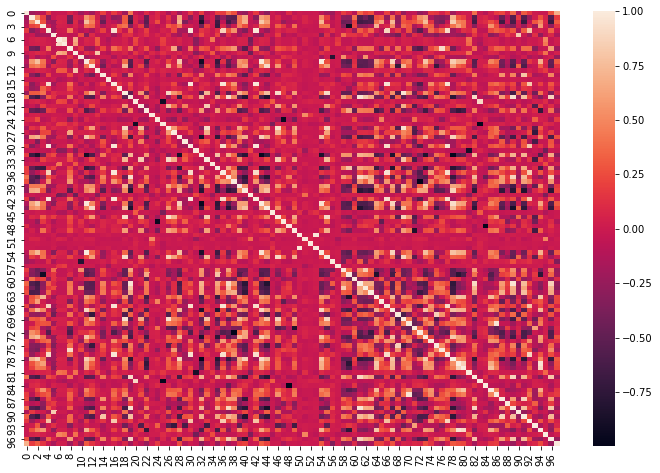

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train_unique.corr())

In [48]:
# find and remove correlated features
def correlation(dataset, threshold):
    corr_col = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corr_col.add(colname)
    return corr_col
corr_features = correlation(X_train_unique, 0.85)
print('Correlated features: ', len(set(corr_features)) )

Correlated features:  38


In [49]:
corrdata = X_train_unique.corr().abs().stack()
corrdata = corrdata.sort_values(ascending = False)
corrdata = corrdata[corrdata > 0.85]
corrdata = corrdata[corrdata < 1]

In [50]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['Features1', 'Features2', 'Corr_Value']
corrdata

,Features1,Features2,Corr_Value
0,72,38,0.997742
1,38,72,0.997742
2,48,84,0.993512
3,84,48,0.993512
4,54,11,0.992407
5,11,54,0.992407
6,42,30,0.992131
7,30,42,0.992131
8,30,16,0.983326
9,16,30,0.983326


In [51]:
grouped_feature_list = []   #to discard only the least performing feature from a group instead of discarding all correlated features
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [52]:
len(correlated_group_list)

22

In [53]:
for group in correlated_group_list:
    print(group)

   Features1  Features2  Corr_Value
0         72         38    0.997742
   Features1  Features2  Corr_Value
2         48         84    0.993512
     Features1  Features2  Corr_Value
4           54         11    0.992407
44          54         43    0.951989
126         54         67    0.875333
155         54         32    0.854114
    Features1  Features2  Corr_Value
6          42         30    0.992131
10         42         16    0.982504
19         42          4    0.977699
58         42         77    0.943550
64         42         66    0.935156
78         42         36    0.924165
    Features1  Features2  Corr_Value
14         53         50     0.98108
     Features1  Features2  Corr_Value
16          78         32    0.980790
77          78         43    0.924860
131         78         28    0.871106
151         78         40    0.860738
     Features1  Features2  Corr_Value
24          89         61    0.966750
49          89         19    0.949788
110         89         37    

In [54]:
##feature importance based on tree based classifier
important_features = []
for group in correlated_group_list:
    features = list(group.Features1.unique())+list(group.Features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state = 0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)  #most important features sorted 
    feat = importance.iloc[0] #foremost feature in the sorted list
    important_features.append(feat)

In [55]:
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace = True, drop = True)

In [56]:
features_to_consider = set(important_features['features'])
features_to_discard = set(corr_features) - features_to_consider
features_to_discard = list(features_to_discard)

In [57]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis = 1)
X_train_grouped_uncorr.shape
X_test_grouped_uncorr = X_test_unique.drop(labels = features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(34297, 71)

In [58]:
X_train_grouped_uncorr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29,31,34,35,38,39,40,41,44,45,47,48,49,50,51,52,55,56,57,58,59,60,62,63,64,65,67,68,70,71,73,74,77,79,83,85,86,87,88,90,91,93,95,97
0,0.038144,0.559626,0.204906,0.343981,0.000986,0.471698,0.069658,0.327336,0.174506,0.541121,0.200000,0.158420,0.934234,0.298916,1.858094e-08,0.75,0.052138,0.422680,0.061856,0.297770,0.441237,0.600833,0.083333,0.193416,0.371134,0.591753,0.524292,0.587602,0.222222,0.119947,0.405542,0.045455,0.582949,0.789354,0.000000,0.868586,0.0,0.737900,0.333333,0.597496,0.500,0.083333,0.5,0.418218,0.800000,0.058824,0.056604,0.430410,0.441039,0.037113,0.090909,0.457526,0.177320,0.221978,0.153883,0.325581,0.433771,0.267922,0.090351,0.000506,0.069824,0.707340,0.257559,0.348837,0.015061,0.116614,0.415094,0.088779,0.166237,0.000000,0.066667
1,0.037686,0.251750,0.136771,0.459987,0.009406,0.751397,0.042503,0.327081,0.341200,0.563522,0.314286,0.105840,0.900328,0.358550,4.859609e-09,1.00,0.528708,0.546343,0.071298,0.326230,0.463638,0.765021,0.000000,0.002368,0.396211,0.712976,0.464993,0.482791,0.888889,0.069254,0.191268,0.385286,0.564611,0.649568,0.142857,0.848415,0.0,0.918103,0.297143,0.819951,0.500,0.083333,0.5,0.657791,0.628571,0.117647,0.051210,0.205483,0.855225,0.067223,0.123457,0.494001,0.045223,0.220526,0.145907,0.318644,0.253105,0.299381,0.081651,0.004884,0.089898,0.740351,0.125420,0.355932,0.313296,0.141558,0.701117,0.154683,0.084029,0.000000,0.057143
2,0.073478,0.351190,0.210300,0.433543,0.019302,0.452979,0.069658,0.321495,0.179554,0.480177,0.246606,0.177713,0.893773,0.240938,5.922802e-08,1.00,0.254120,0.414807,0.097309,0.261301,0.403425,0.688281,0.000000,0.019001,0.360151,0.646718,0.543676,0.457802,0.222222,0.135133,0.356701,0.266528,0.526755,0.799911,0.285714,0.806756,0.0,0.906725,0.475806,0.622396,0.500,0.333333,0.5,0.461754,0.666667,0.058824,0.104546,0.375887,0.184423,0.071165,0.129747,0.480925,0.088077,0.265052,0.196837,0.372340,0.401083,0.331186,0.123145,0.012123,0.099042,0.668033,0.403509,0.406848,0.073078,0.110129,0.337456,0.138308,0.148181,0.181818,0.079470
3,0.073478,0.351190,0.210300,0.433543,0.019302,0.452979,0.069658,0.353014,0.179554,0.630170,0.246606,0.177713,0.893773,0.394818,5.922802e-08,1.00,0.254120,0.414807,0.097309,0.344580,0.403425,0.688281,0.000000,0.019001,0.360151,0.646718,0.543676,0.457802,0.222222,0.053188,0.356701,0.266528,0.526755,0.799911,0.142857,0.806756,1.0,0.906725,0.475806,0.622396,0.125,0.083333,0.5,0.461754,0.666667,0.235294,0.104546,0.375887,0.184423,0.071165,0.129747,0.480925,0.088077,0.265052,0.196837,0.372340,0.401083,0.331186,0.123145,0.012123,0.099042,0.737361,0.403509,0.406848,0.073078,0.110129,0.337456,0.138308,0.148181,0.000000,0.079470
4,0.125141,0.314370,0.153466,0.402054,0.202572,0.430052,0.069658,0.347286,0.207720,0.571554,0.311475,0.100836,0.836721,0.336105,5.701853e-08,1.00,0.286545,0.395340,0.137542,0.299074,0.375799,0.775741,0.000000,0.002955,0.362646,0.693724,0.459507,0.456767,0.222222,0.068080,0.410596,0.310970,0.510201,0.698119,0.285714,0.739287,1.0,0.947069,0.426230,0.565005,0.500,0.166667,0.5,0.478056,0.590164,0.058824,0.147668,0.437184,0.167220,0.128523,0.137230,0.397194,0.032319,0.220853,0.255772,0.256716,0.413120,0.258487,0.186276,0.110942,0.077478,0.689307,0.409998,0.310448,0.286077,0.088967,0.282383,0.219170,0.090896,0.000000,0.098361


In [59]:
%%time
run_RandomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)  #accuracy improved

Accuracy on test set: 
0.7792809866752194
Wall time: 41 s


#### Lasso(L1) Regularization

In [60]:
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [61]:
sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 0.03, solver = 'liblinear'))
sel.fit(X_train_grouped_uncorr, y_train)
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False])

In [62]:
sel.estimator_.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.57655044,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.24069399,  0.        ,  0.        ,  0.        ,  0.72637106,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.88273394, 12.28701353,
         0.        , -0.10816905,  0.        ,  0.        , -0.92215969,
         0.        ,  0.48209128,  0.        ,  0.        ,  0.        ,
         0.        ,  1.73496324,  0.        ,  0.        ,  0.        ,
        -0.23310355,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.27170617,
         0.        ,  0.        ,  0.        ,  0. 

In [63]:
X_train_l1 = sel.transform(X_train_grouped_uncorr)
X_test_l1 = sel.transform(X_test_grouped_uncorr)

In [64]:
X_train_grouped_uncorr.columns[sel.get_support()]

Int64Index([9, 15, 20, 31, 34, 38, 41, 45, 51, 57, 87, 95], dtype='int64')

In [65]:
X_train_l1.shape

(80024, 12)

In [66]:
%%time
run_RandomForest(X_train_l1, X_test_l1, y_train, y_test)   

Accuracy on test set: 
0.7725165466367321
Wall time: 11.8 s


In [67]:
df1 = pd.DataFrame(X_train_l1, columns = ['v14', 'v24', 'v34','v47', 'v50', 'v58','v62','v66','v72','v79','v119','v129' ])
df2 = pd.DataFrame(X_test_l1, columns = ['v14', 'v24', 'v34','v47', 'v50', 'v58','v62','v66','v72','v79','v119','v129' ])
X_train_model = pd.concat([df1,df2])
X_train_model.reset_index().head()
 

,index,v14,v24,v34,v47,v50,v58,v62,v66,v72,v79,v119,v129
0,0,0.541121,0.75,0.297770,0.222222,0.119947,0.045455,0.000000,0.0,0.083333,0.058824,0.015061,0.000000
1,1,0.563522,1.00,0.326230,0.888889,0.069254,0.385286,0.142857,0.0,0.083333,0.117647,0.313296,0.000000
2,2,0.480177,1.00,0.261301,0.222222,0.135133,0.266528,0.285714,0.0,0.333333,0.058824,0.073078,0.181818
3,3,0.630170,1.00,0.344580,0.222222,0.053188,0.266528,0.142857,1.0,0.083333,0.235294,0.073078,0.000000
4,4,0.571554,1.00,0.299074,0.222222,0.068080,0.310970,0.285714,1.0,0.166667,0.058824,0.286077,0.000000


In [68]:
X_train_model.shape

(114321, 12)

In [69]:
X_train_model.to_csv("SelectedFeatures.csv", index = False)

In [70]:
test = pd.read_csv('test.csv') #replace name with your csv name
X_test_model = test.fillna(test.median().to_dict())
X_test_model = X_test_model[[x for x in X_train_model.columns]]
X_test_model = convert_numeric(X_test_model, scaling=True, encoders=encoder, scaler = scaler)[0]

In [71]:
X_test_model.shape

(114393, 12)

### Machine Learning

#### Logistic Regression

In [72]:
Y.shape, X_train_model.shape

((114321,), (114321, 12))

In [73]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix, roc_curve, auc
clf = lr()
clf.fit(X_train_l1, y_train)
confusion_matrix(y_test, clf.predict(X_test_l1))

array([[  475,  7670],
       [  354, 25798]], dtype=int64)

<AxesSubplot:>

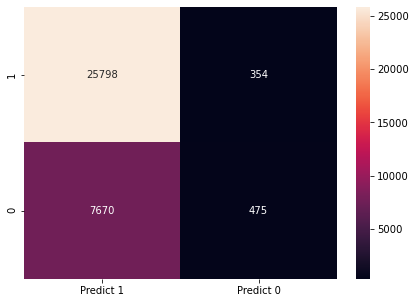

In [74]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(X_test_l1), labels = [1,0])
df_cm = pd.DataFrame (cm , index = [ i for i in ["1", "0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

Text(0.5, 1.0, 'Logistic Regression')

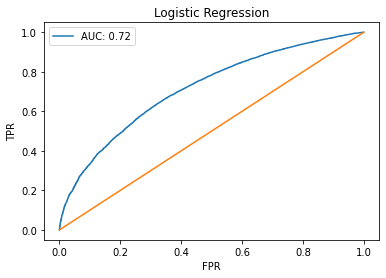

In [75]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_l1)[:,1])
plt.plot(fpr, tpr, label = 'AUC: '+'%.2f'%auc(fpr,tpr))
plt.plot([0,1], [0,1])
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression')

In [76]:
clf.score(X_test_l1, y_test)

0.7660436772895588

In [77]:
from sklearn.metrics import log_loss
log_loss(y_test, clf.predict_proba(X_test_l1)[:,1])

0.49506261189004536

#### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier as rf
clf1 = rf(max_depth = 10, random_state=3)
clf1.fit(X_train_l1, y_train)
confusion_matrix(y_test, clf1.predict(X_test_l1))

array([[ 1347,  6798],
       [  711, 25441]], dtype=int64)

<AxesSubplot:>

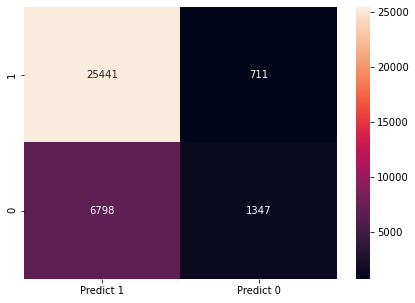

In [79]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf1.predict(X_test_l1), labels = [1,0])
df_cm = pd.DataFrame (cm , index = [ i for i in ["1", "0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

Text(0.5, 1.0, 'Random Forest')

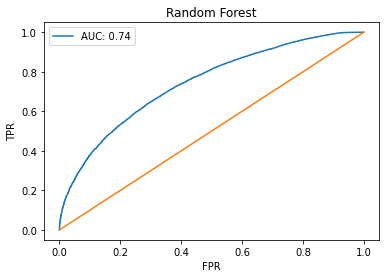

In [80]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, clf1.predict_proba(X_test_l1)[:,1])
plt.plot(fpr, tpr, label = 'AUC: '+'%.2f'%auc(fpr,tpr))
plt.plot([0,1], [0,1])
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest')

In [81]:
clf1.score(X_test_l1, y_test)

0.7810595678922355

In [82]:
from sklearn.metrics import log_loss
log_loss(y_test, clf1.predict_proba(X_test_l1)[:,1])

0.4747119767409208

#### Extra Trees Classifier

In [83]:
from sklearn.ensemble import ExtraTreesClassifier as etc

In [84]:
clf2 = etc(    
    n_estimators = 100,             # Number of trees
    max_features = 0.87,             # Number of features for each tree
    max_depth = 25,                 # Depth of the tree
    min_samples_split = 2,          # Minimum number of samples required to split
    min_samples_leaf = 45,           # Minimum number of samples in a leaf
    min_weight_fraction_leaf = 0,   # Minimum weighted fraction of the input samples required to be at a leaf node. 
    criterion = 'gini',             # Use gini, not going to tune it
    random_state = 27,
    n_jobs = -1)
clf2.fit(X_train_l1, y_train)
confusion_matrix(y_test, clf2.predict(X_test_l1))

array([[ 1413,  6732],
       [  780, 25372]], dtype=int64)

<AxesSubplot:>

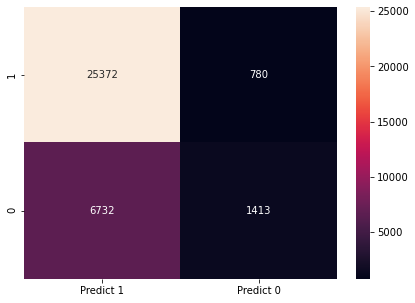

In [85]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf2.predict(X_test_l1), labels = [1,0])
df_cm = pd.DataFrame (cm , index = [ i for i in ["1", "0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [86]:
from sklearn.metrics import log_loss
log_loss(y_test, clf2.predict_proba(X_test_l1)[:,1])

0.4712261459169186

#### XGBoost

In [87]:
import xgboost as xgb
clf3 = xgb.XGBClassifier(
    objective= 'binary:logistic', random_state = 42)

In [88]:
clf3.fit(X_train_l1, y_train)
confusion_matrix(y_test, clf3.predict(X_test_l1))

C:\Users\Kashish G\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[ 1610,  6535],
       [ 1012, 25140]], dtype=int64)

<AxesSubplot:>

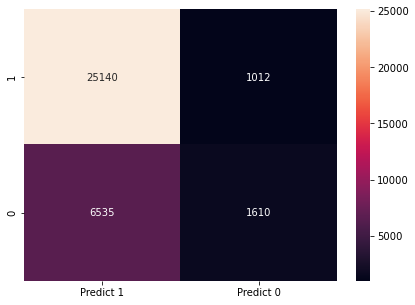

In [89]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf3.predict(X_test_l1), labels = [1,0])
df_cm = pd.DataFrame (cm , index = [ i for i in ["1", "0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [90]:
from sklearn.metrics import log_loss
log_loss(y_test, clf3.predict_proba(X_test_l1)[:,1])

0.4742742664250249

#### Voting Ensembling

In [91]:
from sklearn.ensemble import VotingClassifier
clf4 = VotingClassifier(estimators=[ ('xgb', clf3),  ('extratree', clf2)],
voting='soft', weights=[1,3])

clf4.fit(X_train_l1, y_train)

C:\Users\Kashish G\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1,
                                            random_state=42, reg_alpha=0,
                           

In [92]:
confusion_matrix(y_test, clf4.predict(X_test_l1))

array([[ 1445,  6700],
       [  799, 25353]], dtype=int64)

<AxesSubplot:>

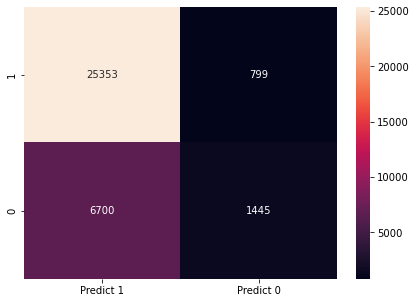

In [93]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf4.predict(X_test_l1), labels = [1,0])
df_cm = pd.DataFrame (cm , index = [ i for i in ["1", "0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [94]:
from sklearn.metrics import log_loss
prediction = clf4.predict_proba(X_test_l1)[:,1]
log_loss(y_test, prediction)

0.470228658253593

In [95]:
clf4.score(X_test_l1, y_test)

0.7813511385835495

In [96]:
prediction = clf4.predict_proba(X_test_l1)[:,1]   #The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1 without [ :,1]
prediction

array([0.46669501, 0.67212949, 0.75676223, ..., 0.83195512, 0.5982353 ,
       0.83098522])

In [97]:
df = pd.DataFrame()
#df["ID"] = test["ID"]
df["PredictedProb"] = prediction
df.head()
df.to_csv("testsubmission.csv", index = False)

#### Voting Ensembling & Predicting Probabilities

In [98]:
from sklearn.ensemble import VotingClassifier
clf4 = VotingClassifier(estimators=[ ('xgb', clf3),  ('extratree', clf2)],
voting='soft', weights=[1,3])

clf4.fit(X_train_model, Y)

C:\Users\Kashish G\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1,
                                            random_state=42, reg_alpha=0,
                           

In [99]:
prediction = clf4.predict_proba(X_test_model)[:,1]   #The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1 without [ :,1]
prediction

array([0.72450498, 0.75596836, 0.74032675, ..., 0.72695632, 0.76235893,
       0.7938979 ])

In [100]:
df = pd.DataFrame()
df["ID"] = test["ID"]
df["PredictedProb"] = prediction
df.head()
df.to_csv("sample_submission.csv", index = False)

In [101]:
sf = pd.DataFrame()
sf["v14"] = train["v14"]
sf["v24"] = train["v24"]
sf["v34"] = train["v34"]
sf["v47"] = train["v47"]
sf["v50"] = train["v50"]
sf["v58"] = train["v58"]
sf["v62"] = train["v62"]
sf["v66"] = train["v66"]
sf["v72"] = train["v72"]
sf["v79"] = train["v79"]
sf["v119"] = train["v119"]
sf["v129"] = train["v29"]
sf.head(10).to_csv("Final_Variables.csv", index = False)


In [102]:
sf1 = pd.DataFrame()
sf1["v14"] = data_imp["v14"]
sf1["v24"] = data_imp["v24"]
sf1["v34"] = data_imp["v34"]
sf1["v47"] = data_imp["v47"]
sf1["v50"] = data_imp["v50"]
sf1["v58"] = data_imp["v58"]
sf1["v62"] = data_imp["v62"]
sf1["v66"] = data_imp["v66"]
sf1["v72"] = data_imp["v72"]
sf1["v79"] = data_imp["v79"]
sf1["v119"] = data_imp["v119"]
sf1["v129"] = data_imp["v29"]
sf1.head(10).to_csv("Final_Variables_Imputed.csv", index = False)
